In [2]:
import polars as pl
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from scipy.stats import binom, logistic

## 6.1 さまざまな種類のデータで応用できるGLM

表6.1 PythonでGLMの構築に使える確率分布の一部
|  | 確率分布 | 乱数生成 | ```glm```の```family```指定 | よく使うリンク関数 |
| ---- | ---- | ---- | ---- | ---- |
| (離散) | 二項分布 | ```binom.rvs(n, p, loc=0, size=1, random_state=None)``` | ```sm.Binomial(link=None, alpha=1.0, check_link=True)``` | ```Logit()``` |
|  | ポアソン分布 | ```poisson.rvs(mu, loc=0, size=1, random_state=None)``` | ```sm.Poisson.(link=None, check_link=True)``` | ```Log()``` |
|  | 負の二項分布 | ```nbinom.rvs(n, p, loc=0, size=1, random_state=None)``` | ```sm.NegativeBinomial(link=None, alpha=1.0, check_link=True)``` | ```Log()``` |
| (連続) | ガンマ分布 | ```gamma.rvs(a, loc=0, scale=1, size=1, random_state=None)``` | ```sm.Gamma(link=None, check_link=True)``` | ```Log()```が多い |
|  | 正規分布 | ```norm.rvs(loc=0, scale=1, size=1, random_state=None)``` | ```sm.Gaussian(link=None, check_link=True)``` | ```None``` |

表6.1の確率分布を使用するためのimport文
| 項目 | ```import```文 |
| ---- | ---- |
| 乱数生成 | ```from scipy.stats import (確率分布)``` |
| ```glm```の```family```指定 | ```import  statsmodels.api as sm``` |
| よく使うリンク関数 | ```sm.families.links``` |

* 乱数分布のURL: https://docs.scipy.org/doc/scipy/reference/stats.html
* ```glm```の```family```のURL: https://www.statsmodels.org/dev/glm.html#families
* リンク関数のURL: https://www.statsmodels.org/0.6.1/glm.html

## 6.2 例題: 上限のあるカウントデータ

In [3]:
da = pl.read_csv("../data/ch 06/data4a.csv").to_pandas()
da.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


<Axes: xlabel='x', ylabel='y'>

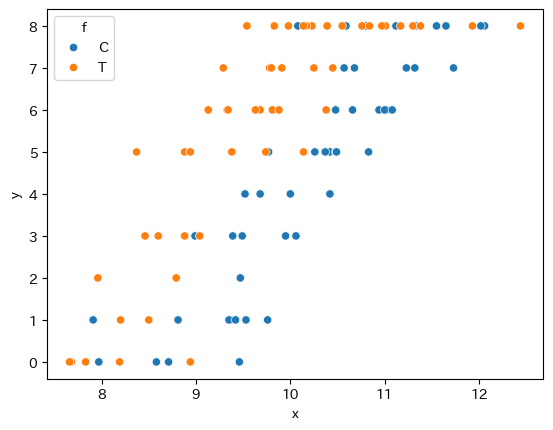

In [4]:
sns.scatterplot(data = da, x = "x", y = "y", hue = "f")

## 6.3 二項分布で表現する「あり・なし」カウントデータ

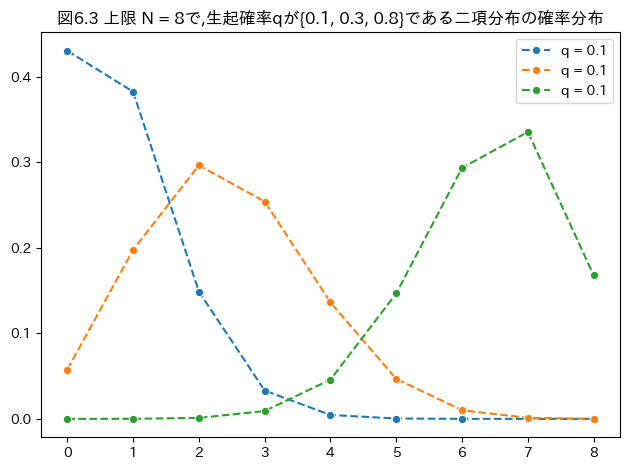

In [5]:
x = np.arange(0, 9)
binom_01 = binom.pmf(k = x, n = 8, p = 0.1)
binom_03 = binom.pmf(k = x, n = 8, p = 0.3)
binom_08 = binom.pmf(k = x, n = 8, p = 0.8)

sns.lineplot(x = x, y = binom_01, marker = "o", linestyle = "--", label = "q = 0.1",)
sns.lineplot(x = x, y = binom_03, marker = "o", linestyle = "--", label = "q = 0.1",)
sns.lineplot(x = x, y = binom_08, marker = "o", linestyle = "--", label = "q = 0.1",)

plt.title(r"図6.3 上限 N = 8で,生起確率qが{0.1, 0.3, 0.8}である二項分布の確率分布")
plt.legend(loc = "best")
plt.tight_layout()

## 6.4 ロジスティック回帰とロジットリンク関数
### 6.4.1 ロジットリンク関数

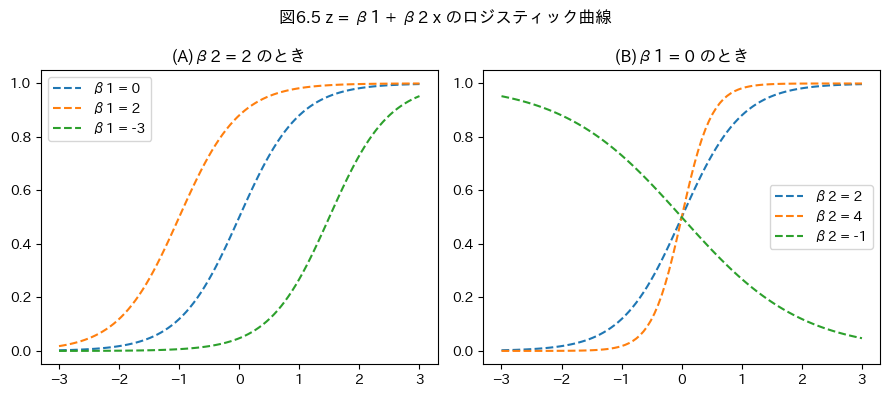

In [6]:
x2 = np.linspace(-3, 3, 100)
logistic_0_2 = 1.0 / ( 1 + np.exp(-(0 + 2 * x2)) )
logistic_2_2 = 1.0 / ( 1 + np.exp(-(2 + 2 * x2)) )
logistic_m3_2 = 1.0 / ( 1 + np.exp(-(-3 + 2 * x2)) )

logistic_0_2 = 1.0 / ( 1 + np.exp(-(0 + 2 * x2)) )
logistic_0_4 = 1.0 / ( 1 + np.exp(-(0 + 4 * x2)) )
logistic_0_m1 = 1.0 / ( 1 + np.exp(-(0 - 1 * x2)) )

fig, axes = plt.subplots(1, 2, figsize = (9, 4))
sns.lineplot(x = x2, y = logistic_0_2, marker = None, linestyle = "--", label = "β1 = 0", ax = axes[0])
sns.lineplot(x = x2, y = logistic_2_2, marker = None, linestyle = "--", label = "β1 = 2", ax = axes[0])
sns.lineplot(x = x2, y = logistic_m3_2, marker = None, linestyle = "--", label = "β1 = -3", ax = axes[0])

sns.lineplot(x = x2, y = logistic_0_2, marker = None, linestyle = "--", label = "β2 = 2", ax = axes[1])
sns.lineplot(x = x2, y = logistic_0_4, marker = None, linestyle = "--", label = "β2 = 4", ax = axes[1])
sns.lineplot(x = x2, y = logistic_0_m1, marker = None, linestyle = "--", label = "β2 = -1", ax = axes[1])

axes[0].set_title("(A)β2 = 2 のとき")
axes[1].set_title("(B)β1 = 0 のとき")
plt.suptitle("図6.5 z = β1 + β2 x のロジスティック曲線")
plt.legend()
plt.tight_layout()

### 6.4.2 パラメータ推定

In [7]:
form = "y + I(N - y) ~ x + f"
model = smf.glm(formula = form, data = da, family = sm.families.Binomial()).fit()

In [8]:
model.params

Intercept   -19.536066
f[T.T]        2.021506
x             1.952406
dtype: float64

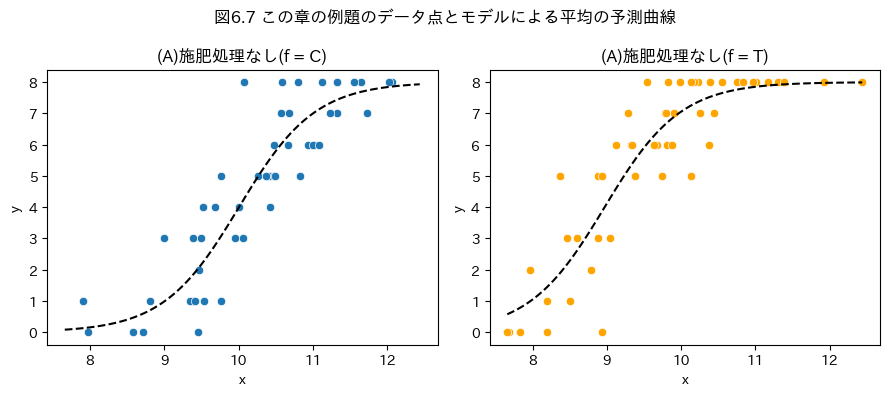

In [9]:
x3c = pl.DataFrame({
    "x": np.linspace(da["x"].min(), da["x"].max(), 100),
    "f": ["C"] * 100
}).to_pandas()
y3c =  da["N"].max() * model.predict(x3c)

x3t = pl.DataFrame({
    "x": np.linspace(da["x"].min(), da["x"].max(), 100),
    "f": ["T"] * 100
}).to_pandas()
y3t =  da["N"].max() * model.predict(x3t)

fig, axes = plt.subplots(1, 2, figsize = (9, 4))
sns.scatterplot(data = da[da["f"] == "C"], x = "x", y = "y", ax = axes[0])
sns.lineplot(x = x3c["x"], y = y3c, marker = None, linestyle = "--", color = "black", ax = axes[0])

sns.scatterplot(data = da[da["f"] == "T"], x = "x", y = "y", color = "orange", ax = axes[1])
sns.lineplot(x = x3t["x"], y = y3t, marker = None, linestyle = "--", color = "black", ax = axes[1])

plt.suptitle("図6.7 この章の例題のデータ点とモデルによる平均の予測曲線")
axes[0].set_title("(A)施肥処理なし(f = C)")
axes[1].set_title("(A)施肥処理なし(f = T)")
plt.tight_layout()

In [10]:
model.params

Intercept   -19.536066
f[T.T]        2.021506
x             1.952406
dtype: float64

### 6.4.3 ロジットリンク関数の意味・解釈

### 6.4.4 ロジスティック回帰のモデル選択

In [11]:
form_const = "y + I(N - y) ~ 0 + np.power(x, 0)"
model_const = smf.glm(formula = form_const, data = da, family = sm.families.Binomial()).fit()

form_f = "y + I(N - y) ~ f"
model_f = smf.glm(formula = form_f, data = da, family = sm.families.Binomial()).fit()

form_x = "y + I(N - y) ~ x"
model_x = smf.glm(formula = form_x, data = da, family = sm.families.Binomial()).fit()

form_x_f = "y + I(N - y) ~ x + f"
model_x_f = smf.glm(formula = form_x_f, data = da, family = sm.families.Binomial()).fit()

In [12]:
# モデルのあてはまりの悪さ
print("\n一定モデル")
print("対数尤度 log L:", np.round(model_const.llf, 1))
print("逸脱度 deviance - 2log L:", np.round(-2 * model_const.llf, 1))
print("差逸脱度 redisual  deviance:", np.round(model_const.deviance, 1))
print("AIC:", np.round(model_const.aic, 1))

print("\nfモデル")
print("対数尤度 log L:", np.round(model_f.llf, 1))
print("逸脱度 deviance - 2log L:", np.round(-2 * model_f.llf, 1))
print("差逸脱度 redisual  deviance:", np.round(model_f.deviance, 1))
print("AIC:", np.round(model_f.aic, 1))

print("\nxモデル")
print("対数尤度 log L:", np.round(model_x.llf, 1))
print("逸脱度 deviance - 2log L:", np.round(-2 * model_x.llf, 1))
print("差逸脱度 redisual  deviance:", np.round(model_x.deviance, 1))
print("AIC:", np.round(model_x.aic, 1))

print("\nx+fモデル")
print("対数尤度 log L:", np.round(model_x_f.llf, 1))
print("逸脱度 deviance - 2log L:", np.round(-2 * model_x_f.llf, 1))
print("差逸脱度 redisual  deviance:", np.round(model_x_f.deviance, 1))
print("AIC:", np.round(model_x_f.aic, 1))


一定モデル
対数尤度 log L: -321.2
逸脱度 deviance - 2log L: 642.4
差逸脱度 redisual  deviance: 499.2
AIC: 644.4

fモデル
対数尤度 log L: -316.9
逸脱度 deviance - 2log L: 633.8
差逸脱度 redisual  deviance: 490.6
AIC: 637.8

xモデル
対数尤度 log L: -180.2
逸脱度 deviance - 2log L: 360.3
差逸脱度 redisual  deviance: 217.2
AIC: 364.3

x+fモデル
対数尤度 log L: -133.1
逸脱度 deviance - 2log L: 266.2
差逸脱度 redisual  deviance: 123.0
AIC: 272.2


表6.2 種子の生存確率のモデルのAICなど. 
| モデル | k | $\log L$ | deviance -2 $\log L$ | residual deviance | AIC |
| ---- | ---- | ---- | ----- | ---- | ---- |
| 一定 | 1 | -321.2 | 642.4 | 499.2 | 644.4|
| $f$ | 2 | -316.9 | 633.8 | 490.6 | 637.8 |
| $x$ | 2 | -180.2 | 360.3 | 217.2 | 364.3 |
| $x+f$ | 3 | -133.1 | 266.2 | 123.0 | 272.2 |

## 6.5 交互作用の入った線形予測子

In [13]:
form_xf = "y + I(N - y) ~ x + f + x:f"
model_xf = smf.glm(formula = form_xf, data = da, family = sm.families.Binomial()).fit()

print("\nxfモデル")
print("対数尤度 log L:", np.round(model_xf.llf, 1))
print("逸脱度 deviance - 2log L:", np.round(-2 * model_xf.llf, 1))
print("差逸脱度 redisual  deviance:", np.round(model_xf.deviance, 1))
print("AIC:", np.round(model_xf.aic, 1))


xfモデル
対数尤度 log L: -132.8
逸脱度 deviance - 2log L: 265.6
差逸脱度 redisual  deviance: 122.4
AIC: 273.6


表6.2 に交互作用モデルの結果を追加した
| モデル | k | $\log L$ | deviance -2 $\log L$ | residual deviance | AIC |
| ---- | ---- | ---- | ----- | ---- | ---- |
| 一定 | 1 | -321.2 | 642.4 | 499.2 | 644.4|
| $f$ | 2 | -316.9 | 633.8 | 490.6 | 637.8 |
| $x$ | 2 | -180.2 | 360.3 | 217.2 | 364.3 |
| $x+f$ | 3 | -133.1 | 266.2 | 123.0 | 272.2 |
| $xf$ | 4 | -132.8 | 265.6 | 122.4 | 273.6 |

## 6.6 割り算値の統計モデリングはやめよう

### 6.6.1 割り算値いらずのオフセット項わざ

In [14]:
db = pl.read_csv("../data/ch 06/data4b.csv").to_pandas()
db.describe()

,y,x,A
count,100.000000,100.000000,100.000000
mean,48.090000,0.514100,10.468000
std,17.137056,0.188573,2.927262
min,13.000000,0.050000,3.500000
25%,36.000000,0.400000,8.800000
50%,46.000000,0.515000,10.300000
75%,59.500000,0.642500,12.150000
max,95.000000,0.990000,17.400000


In [15]:
form_offset = "y ~ x"
model_offset = smf.glm(formula = form_offset, data = db, offset = np.log(db['A']),  family = sm.families.Poisson()).fit()

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\treme\AppData\Local\Temp\ipykernel_8040\2470921137.py:9: SyntaxWarning: invalid escape sequence '\c'
  sns.scatterplot(data = db, x = "x", y = "y", marker = "$\circ$", ec = "face", s = 50)


Text(0.5, 1.0, '図6.10変更 オフセット項を利用するGLMを説明するための例題')

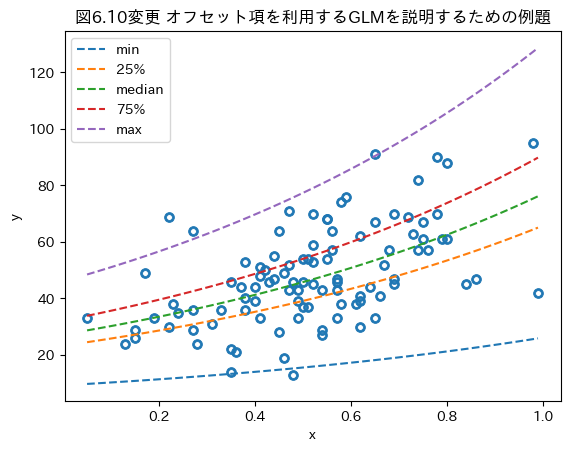

In [16]:
N = 100
x4 = np.linspace(db["x"].min(), db["x"].max(), N)
a_min = [db["A"].min()] * N
a_25 = [db["A"].quantile(q = 0.25)] * N
a_median = [db["A"].median()] * N
a_75 = [db["A"].quantile(q = 0.75)] * N
a_max = [db["A"].max()] * N

sns.scatterplot(data = db, x = "x", y = "y", marker = "$\circ$", ec = "face", s = 50)
sns.lineplot(x = x4, y = db["A"].min() * model_offset.predict(pl.DataFrame({"x": x4, "A": a_min}).to_pandas()), marker = None, linestyle = "--", label = "min")
sns.lineplot(x = x4, y = db["A"].quantile(q = 0.25) * model_offset.predict(pl.DataFrame({"x": x4, "A": a_25}).to_pandas()), marker = None, linestyle = "--", label = "25%")
sns.lineplot(x = x4, y = db["A"].median() * model_offset.predict(pl.DataFrame({"x": x4, "A": a_median}).to_pandas()), marker = None, linestyle = "--", label = "median")
sns.lineplot(x = x4, y = db["A"].quantile(q = 0.75) * model_offset.predict(pl.DataFrame({"x": x4, "A": a_75}).to_pandas()), marker = None, linestyle = "--", label = "75%")
sns.lineplot(x = x4, y = db["A"].max() * model_offset.predict(pl.DataFrame({"x": x4, "A": a_max}).to_pandas()), marker = None, linestyle = "--", label = "max")

plt.legend(loc = "best")
plt.title("図6.10変更 オフセット項を利用するGLMを説明するための例題")


## 6.7 正規分布とその尤度

## 6.8 ガンマ分布のGLM

In [17]:
d6_8 = pl.read_parquet("../data/ch 06/data6_8.parquet")
d6_8.head()

x,y
f64,f64
0.001,0.000887
0.017306,0.023465
0.033612,0.069876
0.049918,0.03434
0.066224,0.02652


In [18]:
form_gamma = "y ~ x"
model_gamma = smf.glm(formula = form_gamma, data = d6_8, family = sm.families.Gamma(link = sm.families.links.log())).fit()

c:\Users\treme\.conda\envs\ds_env\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\treme\AppData\Local\Temp\ipykernel_8040\3880589756.py:9: SyntaxWarning: invalid escape sequence '\c'
  sns.scatterplot(data = d6_8, x = "x", y = "y", marker = "$\circ$", ec = "face", s = 50)


<Axes: xlabel='x', ylabel='y'>

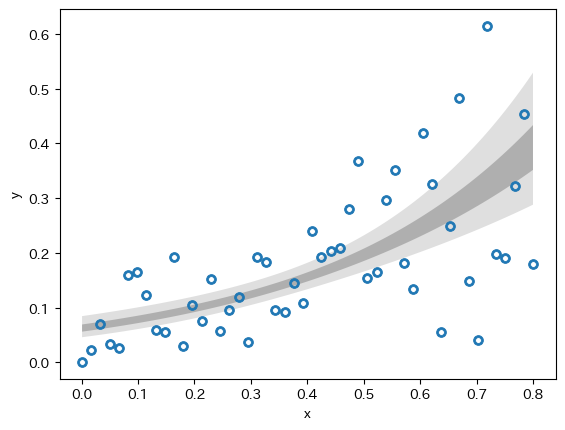

In [23]:
N = 100
x5 = pl.DataFrame({"x": np.linspace(d6_8["x"].min(), d6_8["x"].max(), N)}).to_pandas()

y5_95 = model_gamma.get_prediction(x5).conf_int()
y5_50 = model_gamma.get_prediction(x5).summary_frame(alpha = 0.5)

plt.fill_between(x5["x"], y5_95[:, 0], y5_95[:, 1], fc = "gray", alpha = 0.25)
plt.fill_between(x5["x"], y5_50["mean_ci_lower"], y5_50["mean_ci_upper"], fc = "gray", alpha = 0.5)
sns.scatterplot(data = d6_8, x = "x", y = "y", marker = "$\circ$", ec = "face", s = 50)



## 6.9 この章のまとめと参考文献
* GLMでは応答変数のばらつきを表現する確率分布は正規分布だけでなく,ポ阿曽温分布・二項分布・ガンマ分布などが選択できる
* 「N個の観察対象のうちk個で反応が見られた」というタイプのデータにみられるばらつきをあらわすために二項分布が使える
* 生起確率と線形予測子を結びつけるロジットリンク関数を使ったGLMのあてはめは,ロジスティック回帰とよばれる.
* 線形予測子の構成要素として,複数の説明変数の積の効果を見る交互作用項が使える.
* データ解析でしばしばみられる観測値どうしの除算値作成や,応答変数の変数変換の問題点をあげ,ロジスティック回帰やオフセット項の工夫をすれば,情報消失の原因となる「データの加工」は不要になる.
* 連続値の確率変数のばらつきを表現する確率分布としては,正規分布・ガンマ分布などがあり,これらを統計モデルの部品として使うときには,離散値の確率分布との違いに注意しなければならない.

* Agresti「カテゴリカルデータ解析入門」
* 岩崎「カウントデータの統計解析」
